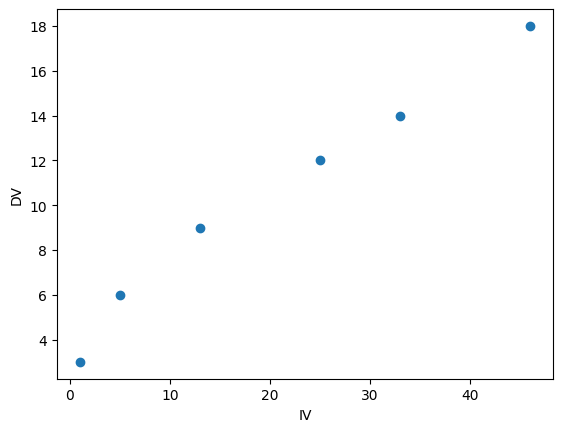

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


x=np.array([1,5,13,25,33,46]).reshape((-1,1))
y=np.array([3,6,9,12,14,18])



plt.scatter(x,y)
plt.xlabel("IV")
plt.ylabel("DV")
plt.show()

MSE: 0.5056719506337065
intercept: 3.938587739718434
slope: [0.31193881]


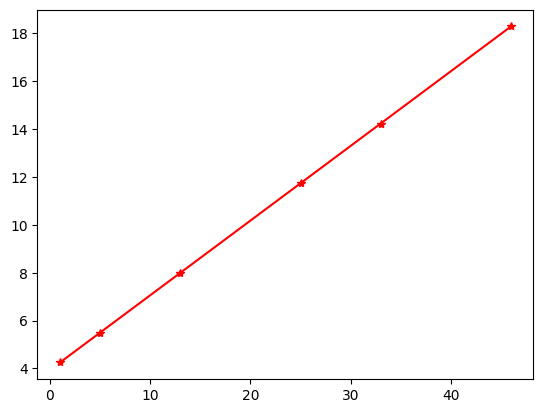

In [ ]:
from sklearn.linear_model import LinearRegression


SLR=LinearRegression()


SLR.fit(x,y)
pred=SLR.predict(x)


from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y,pred)
plt.plot(x,pred,color='Red', marker='*')

print("MSE:", mse)
print("intercept:", SLR.intercept_)
print("slope:", SLR.coef_)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import random

random.seed(42)
num_points = 50
x = np.linspace(0, 10, num_points)
y = 2 * x + 1 + np.random.normal(0, 1, num_points)

model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
predicted_y = model.predict(x.reshape(-1, 1))

data = pd.DataFrame({'x': x, 'y': y, 'predicted_y': predicted_y})

data.to_excel('linear_regression_data.xlsx', index=False)


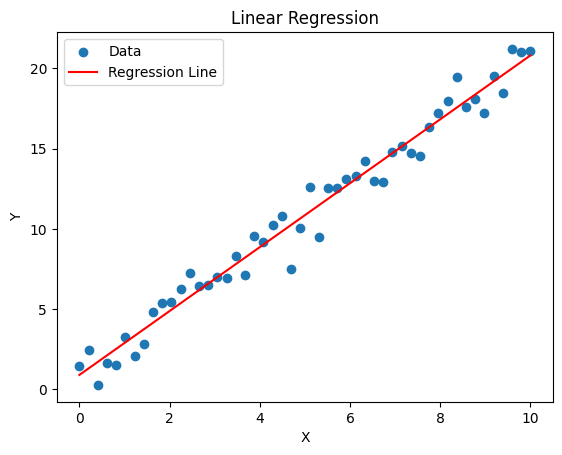

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read data from Excel
data = pd.read_excel('/content/linear_regression_data.xlsx')

# Extract x and y values
x = data['x']
y = data['y']

# Perform linear regression
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)
predicted_y = model.predict(x.values.reshape(-1, 1))

# Plot the data and regression line
plt.scatter(x, y, label='Data')
plt.plot(x, predicted_y, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.show()

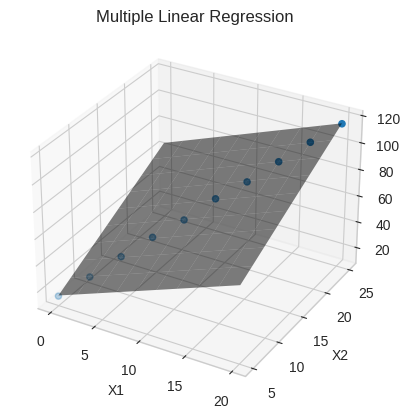

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import random

random.seed(40)
num_points = 10

# Generate two sets of synthetic data
x1 = np.linspace(0, 20, num_points)
x2 = np.linspace(5, 25, num_points)
y = 2 * x1 + 3 * x2 + 1 + np.random.normal(0, 1, num_points)

X = np.column_stack((x1, x2))
model = LinearRegression().fit(X, y)
predicted_y = model.predict(X)

data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y, 'predicted_y': predicted_y})
data.to_csv('linear_regression_data_multi_features.csv', index=False)

x1_mesh, x2_mesh = np.meshgrid(x1, x2)
predicted_y_mesh = model.predict(np.column_stack((x1_mesh.ravel(), x2_mesh.ravel())))
predicted_y_mesh = predicted_y_mesh.reshape(x1_mesh.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, label='Data')
ax.plot_surface(x1_mesh, x2_mesh, predicted_y_mesh, color='black', alpha=0.5, label='Regression')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Multiple Linear Regression')
plt.show()

**SVM**

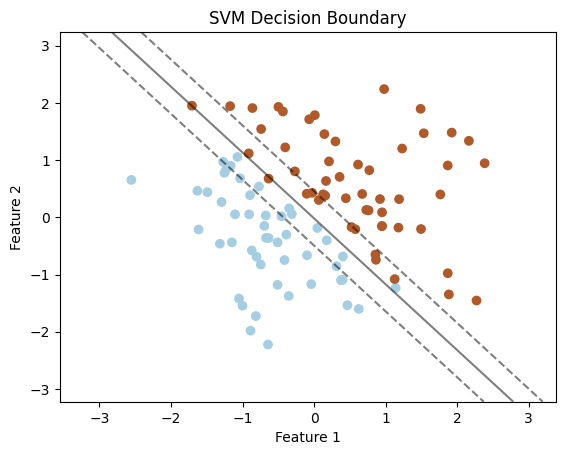

<ipython-input-1-3a603349df70>:33: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


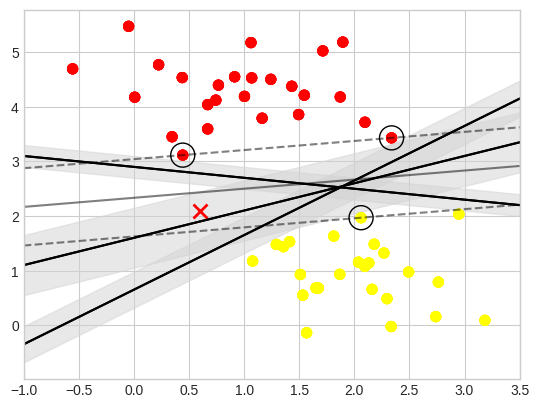

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

# Generate synthetic data
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

# Create an SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Create a mesh grid to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from scipy import stats

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='lightgray', alpha=0.5)

plt.xlim(-1, 3.5);

from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);


***linear regration with binary***

Accuracy: 0.95
Confusion Matrix:
[[10  1]
 [ 0  9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



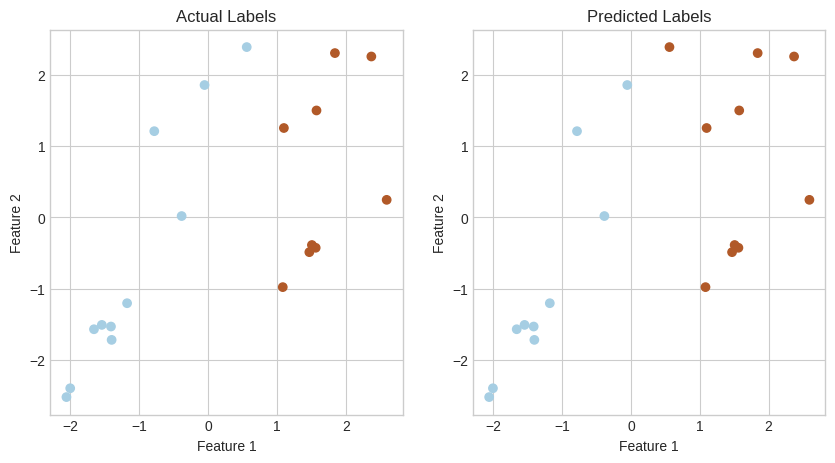

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification

# Generate a sample dataset for binary classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Plot the decision boundary
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired)
plt.title('Actual Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.Paired)
plt.title('Predicted Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()


***kmean algorithm***

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


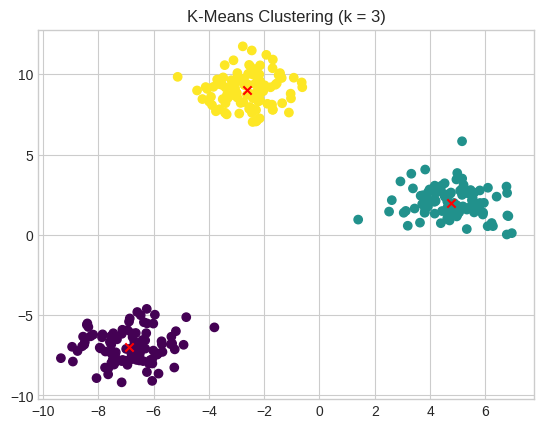

In [5]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate a sample dataset (you can replace this with your own data)
data, labels = make_blobs(n_samples=300, centers=3, random_state=42)

# Initialize the KMeans model with the number of clusters (k) you want
k = 3
kmeans = KMeans(n_clusters=k)

# Fit the model to your data
kmeans.fit(data)

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Plot the data points and cluster centers
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x')
plt.title('K-Means Clustering (k = {})'.format(k))
plt.show()


***dimensnality reduction using pca***

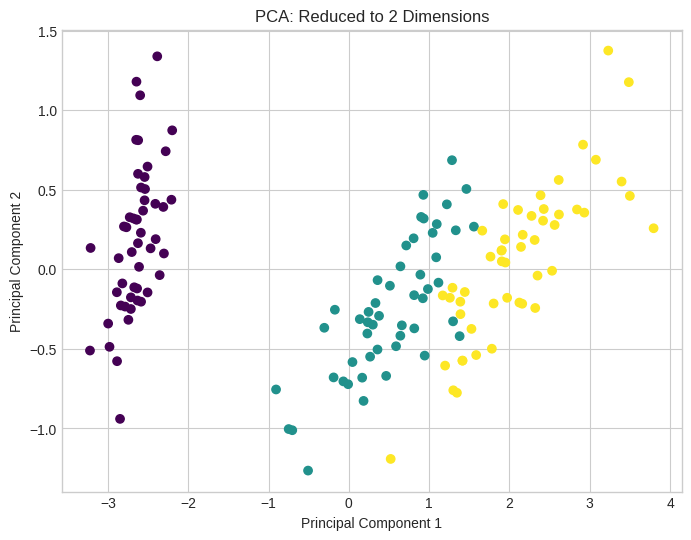

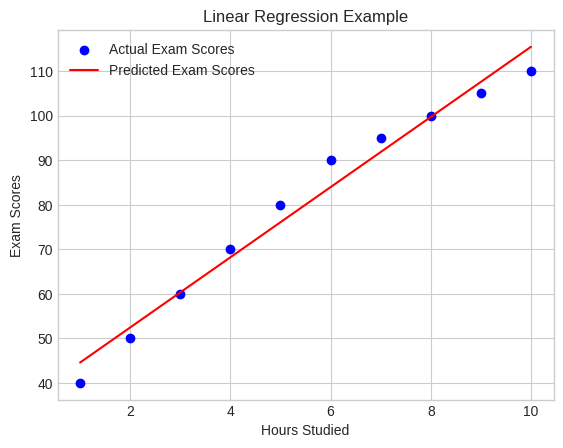

Predicted score for 5.5 hours of study: 80.00


In [6]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load a sample dataset (Iris dataset as an example)
data = load_iris()
X = data.data
y = data.target

# Perform PCA with the number of components you desire
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA: Reduced to {} Dimensions'.format(n_components))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()





import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample data
hours_studied = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Independent variable
exam_scores = np.array([40, 50, 60, 70, 80, 90, 95, 100, 105, 110])  # Dependent variable

# Reshape the data
hours_studied = hours_studied.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(hours_studied, exam_scores)

# Make predictions
predicted_scores = model.predict(hours_studied)

# Visualize the results
plt.scatter(hours_studied, exam_scores, color='blue', label='Actual Exam Scores')
plt.plot(hours_studied, predicted_scores, color='red', label='Predicted Exam Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Scores')
plt.legend()
plt.title('Linear Regression Example')
plt.show()

# Predict the score for a student who studied for 5.5 hours
hours_studied_new = np.array([[5.5]])
predicted_score = model.predict(hours_studied_new)
print(f"Predicted score for 5.5 hours of study: {predicted_score[0]:.2f}")